# Ernestina Boatemaa Kyere
### Capstone Project - Netflix Analysis

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#adding dataset
netflix = pd.read_csv("netflix_titles.csv")

In [3]:
#Research questions
#1. What content type does Netflix produce more?
#2. Who are the top 10 directors by number of movies/tv shows?
#3. How many contents are released over the years?
#4. Which year had the most released contents?
#5. What are the ratings in movies and tV shows shown by netflix?
#6. Which countries produced the most movies and tv shows?
#7. Which genres are the most common in the movies and tv shows?
#8. Which movie duration has the highest number of movies?
#9. Which season has the highest number of tv shows?
#10. Which countries have the highest number of directors? 

In [4]:
#displaying first 10 rows
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [5]:
#Listing Columns
Data_columns = list(netflix.columns)

In [6]:
Data_columns

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [7]:
#Summary of data
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
#identifying the duplicates
netflix.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [9]:
#summing duplicates
netflix.duplicated().sum()

0

In [10]:
#summing nulls
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
#checking errors in rating column
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [12]:
#Replacing errors
netflix['rating'] = netflix['rating'].replace({'74 min': 'Nan', '84 min': 'Nan', '66 min': 'Nan', 'TV-Y7-FV': 'Nan'})

In [13]:
#removing missing values in the dataset
netflix.dropna(inplace=True)

In [29]:
#Checking for null values
netflix.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [14]:
#descriptive statistics of data
netflix.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [15]:
#Dropping unwanted columns
netflix.drop(['show_id','description'], axis = 1, inplace = True)

In [16]:
#Shape of data
netflix.shape

(5332, 10)

In [17]:
#checking data types of each column
netflix.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [18]:
#Converting date_added column to date type
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

## Displaying Visuals

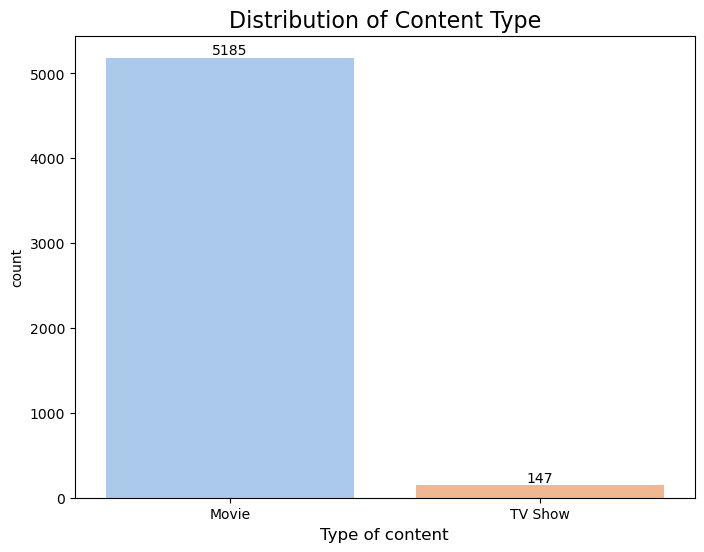

In [19]:
#Displaying Content type
plt.figure(figsize=(8, 6))
sns.countplot(data=netflix, x='type', palette='pastel')

# Annotate the bars with values
ax = plt.gca()
for i, value in enumerate(netflix['type'].value_counts()):
    plt.annotate(str(value), (i, value), ha='center', va='bottom')

plt.title('Distribution of Content Type', fontsize=16)
plt.xlabel('Type of content', fontsize=12)
plt.show()

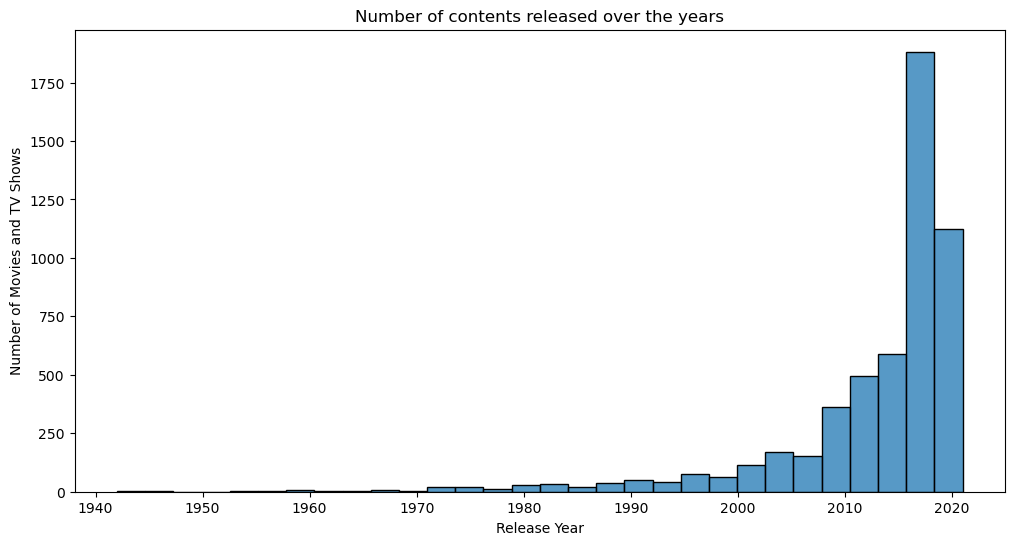

In [20]:
# Number of content type released over the years
plt.figure(figsize=(12, 6))
sns.histplot(netflix['release_year'], bins=30, kde=False)
plt.title('Number of contents released over the years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies and TV Shows')
plt.show()

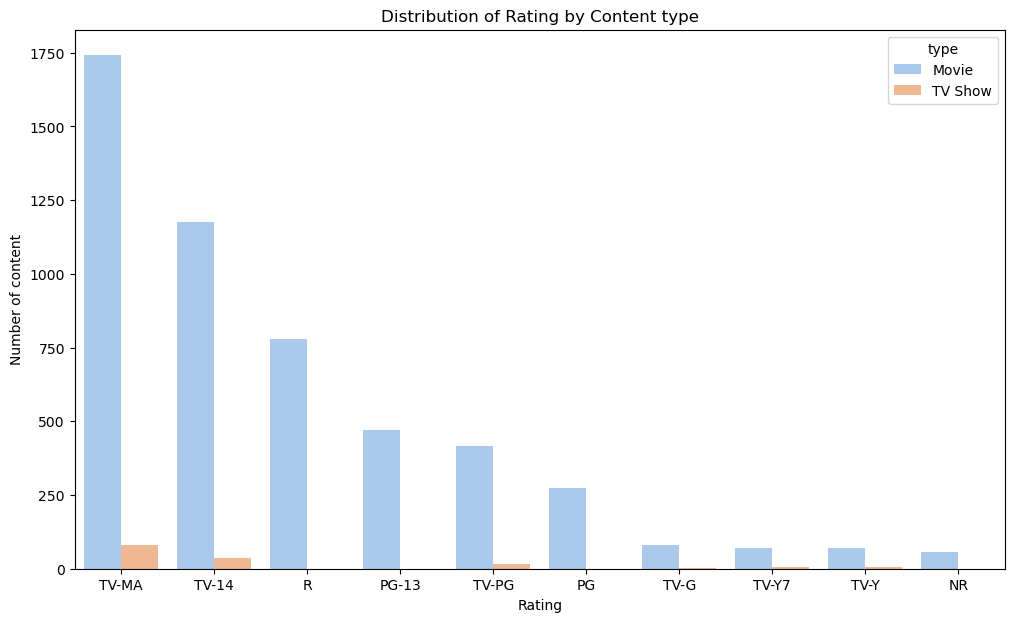

In [31]:
#Ratings by content type
plt.figure(figsize=(12, 7))
sns.countplot(data=netflix, x='rating', hue='type', palette='pastel', order=netflix['rating'].value_counts().head(10).index)
plt.xlabel('Rating')
plt.ylabel('Number of content')
plt.title("Distribution of Rating by Content type")

plt.show()

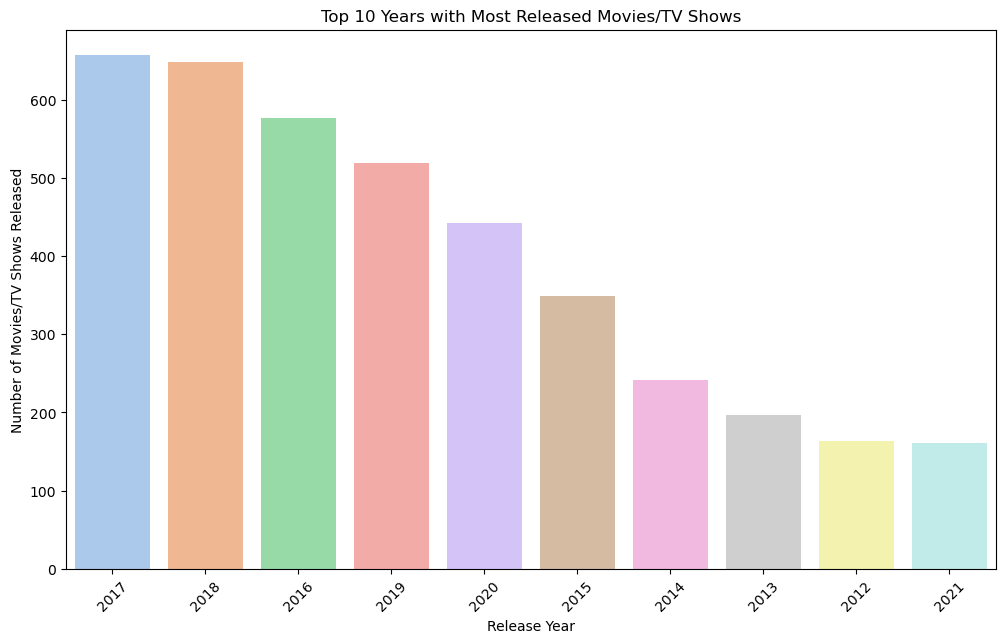

In [22]:
#Year with most released contents
plt.figure(figsize=(12, 7))
sns.countplot(data=netflix, x='release_year', palette='pastel', order=netflix['release_year'].value_counts().index[:10])
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows Released')
plt.title("Top 10 Years with Most Released Movies/TV Shows")
plt.xticks(rotation=45)

plt.show()

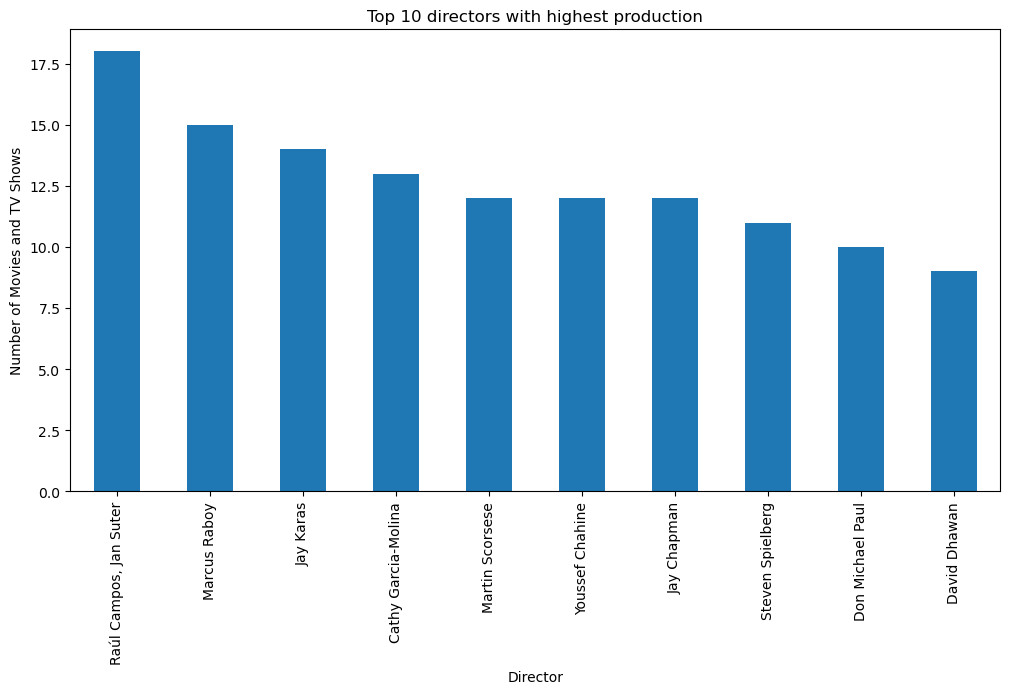

In [23]:
# Top 10 Directors by content type
top_directors = netflix['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar') 
plt.title('Top 10 directors with highest production')
plt.xlabel('Director')
plt.ylabel('Number of Movies and TV Shows')
plt.show()

Text(0.5, 1.0, 'Number of Content type in Top 10 Countries')

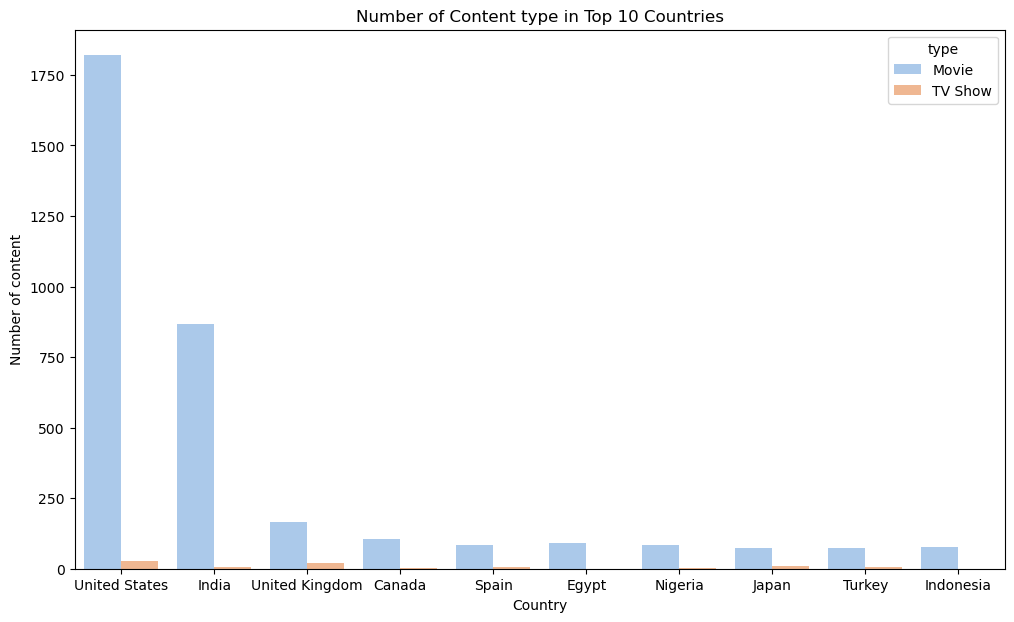

In [24]:
#Top 10 countries with most contents
plt.figure(figsize=(12,7))
sns.countplot(data=netflix, x = 'country', hue = 'type', palette ='pastel', order = netflix['country'].value_counts().head(10).index)  
plt.xlabel('Country')
plt.ylabel('Number of content')
plt.title('Number of Content type in Top 10 Countries')

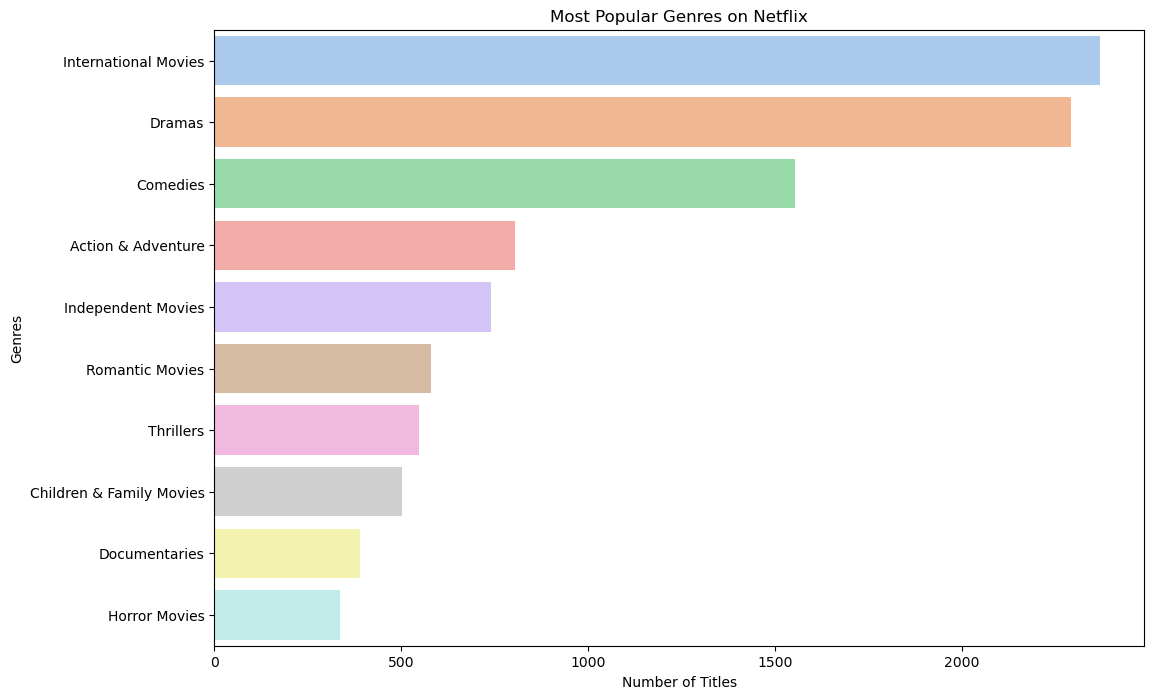

In [25]:
#Top 10 genres in movies and tv shows
genres = netflix['listed_in'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(data=netflix, x=genres.values, y=genres.index, palette = 'pastel')
plt.title('Most Popular Genres on Netflix')
plt.xlabel("Number of Titles")
plt.ylabel("Genres")
plt.show()

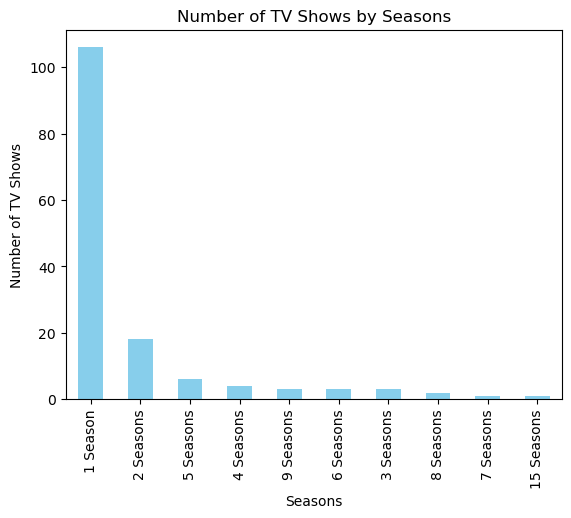

In [26]:
#Tv show insight
type = netflix[netflix['type'] == 'TV Show']['duration'].value_counts().head(10)
type.plot(kind='bar', title='Number of TV Shows by Seasons', color='skyblue')
plt.xlabel('Seasons')
plt.ylabel('Number of TV Shows')
plt.show()

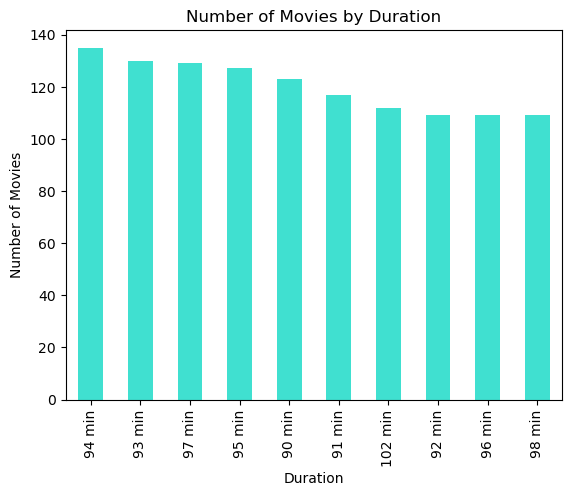

In [27]:
#Number of movies by duration
type = netflix[netflix['type'] == 'Movie']['duration'].value_counts().head(10)
type.plot(kind='bar', title='Number of Movies by Duration', color='turquoise')
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.show()

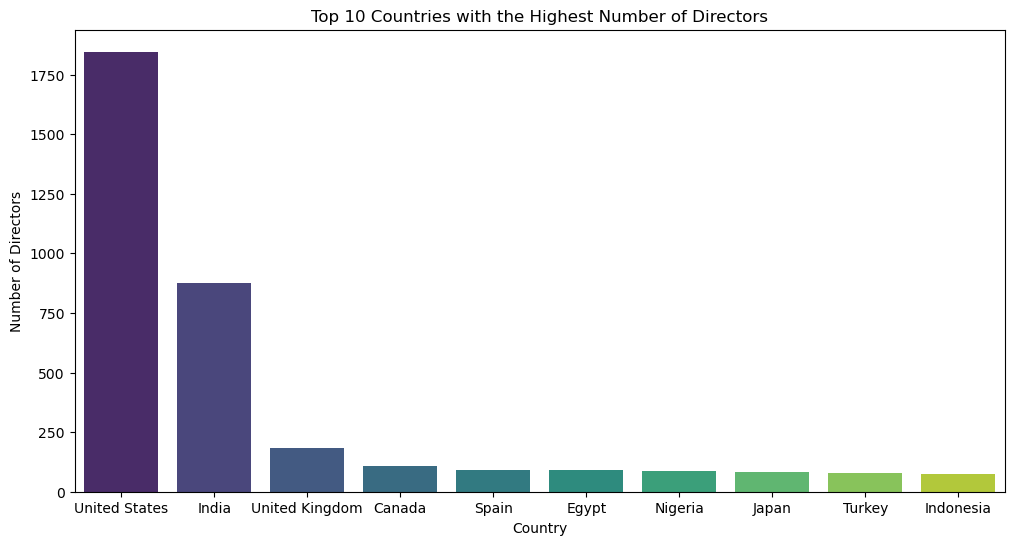

In [28]:
director_counts = netflix[netflix['director'].notna()]['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.index, y=director_counts.values, palette='viridis')
plt.title('Top 10 Countries with the Highest Number of Directors')
plt.xlabel('Country')
plt.ylabel('Number of Directors')
plt.show()

# CONCLUSION
Netflix is one of the most popular media and video streaming platforms boasting a vast and diverse content library with over 6,000 movies and 2,000 TV shows as of 2021. This dataset provides a comprehensive view of Netflix's offerings, encompassing various details such as release years, content types, directors, countries of origin, genres, and content ratings assigned by Netflix.

### Content Type Distribution:
Netflix has a diverse collection, including 6,131 movies and 2,676 TV shows. This variety ensures a well-rounded streaming experience, appealing to a wide audience with different preferences.

### Number of Contents Released Over the Years:
Netflix has experienced exponential growth from 2000 to 2021, with a substantial increase in the number of content released. This upward trend reflects Netflix's dedication to consistently updating its content library, meeting the rising demand for fresh and engaging material. The platform's commitment to regular updates contributes to its dynamic and ever-expanding range of offerings.

### Ratings Distribution by Content Type:
The analysis of Netflix's content ratings reveals a notable preference for mature content, with 'TV-MA' being the most prevalent with 2062 movies and 1142 tv shows. The top three ratings are 'TV-MA' (Mature Audiences), 'TV-14' (suitable for viewers 14 and above, with parental caution), and 'TV-PG' (Parental Guidance Suggested). This indicates a diverse range of content catering to different age groups and viewer preferences.

### Top 10 Years with Most Released Movies/TV Shows:
The content release pattern on Netflix has demonstrated a fluctuating trajectory, experiencing an upward surge from 2012 to 2018, reaching its peak during this period. However, a subsequent decline is observed from 2019 to 2021, marked by a reduction in the number of content releases. This fluctuation suggests a dynamic and evolving strategy in response to changing industry dynamics or other factors.

### Top 10 Directors with Highest Production:
Identifying top directors with high production rates reveals influential contributors to Netflix's content library. Notably, Rajiv Chilaka leads with 19 contents, followed closely by Raul Campos,Jan Suter with 18 contents each. Marcus Raboy and Suhas Kadav also stand out with 16 contents each. These directors play a pivotal role in shaping Netflix's narrative and diverse content offerings.

### Most Popular Genres on Netflix:
Analyzing the most popular genres on Netflix, with International movies, dramas, and comedies leading the charts, offers crucial insights into audience preferences. This information is instrumental for content creators and platform administrators in tailoring future offerings to align with viewer demands. Recognizing the popularity of these genres guides strategic content decisions, ensuring that the platform continues to provide content that resonates effectively with its audience.

### Top 10 Countries with Most Contents:
Netflix offers a diverse global library, with the United States leading in both movies (2,058) and TV shows (760). India, the UK, and Canada contribute significantly to movie content with 893, 206, and 122 titles, respectively. For TV shows, the UK stands out with 213, followed by Japan (169) and South Korea (158), making the UK the second-highest contributor after the US. Overall, Netflix's content diversity reflects its worldwide presence.

### TV Shows and Their Duration:
Analyzing TV shows with the given dataset, it was observed that 1,793 have only one season, indicating a preference for shorter series formats. Additionally, there's a trend suggesting that as the season length increases, the number of contents decreases. This insight is vital for making informed decisions on content planning, renewals, and new productions to align with viewer preferences

### Movies with the Highest Duration:
Looking at different movie lengths on Netflix, we see that 90-minute movies are popular with 152 contents. As the movie duration increases, there are fewer contents. This helps Netflix decide what movies to get and make in the future, based on what viewers like.

### Top 10 Countries with the Highest Number of Directors:
Recognizing countries with the most directors highlights the global talent contributing to Netflix. The US leads with 2,048 directors, followed by India with 890 and the UK with 212. These countries serve as vital hubs for creative minds shaping the entertainment industry on the platform.

In summary, Netflix's success is attributed to its extensive content library, adaptability in responding to viewer preferences, industry trends, and the creative contributions of talent from around the world. The platform's dynamic approach positions it as a leader in the ever-evolving landscape of digital streaming.

# Recommendations:
### Investing in Movies and TV Shows for Diverse Viewer Appeal
To enhance the diverse content library, Netflix should continue investing in both movies and TV shows to cater to a wide audience. Regularly assessing viewer preferences and introducing new genres can further enrich the streaming experience.

### Adapting to Trends and Fostering Originality
Netflix's commitment to consistent updates is commendable. To sustain growth, it's advisable to stay attuned to emerging trends, invest in original content, and consider strategic partnerships. This approach will ensure the platform remains dynamic and competitive.

### Expanding Beyond Mature Content
While maintaining a variety of mature content, Netflix should also explore expanding content for different age groups. Investing in family-friendly content with 'TV-PG' ratings can attract a broader audience and make the platform more inclusive.

### Adapting to Viewer Preferences
Understanding the fluctuating content release pattern is crucial. Netflix should continuously evaluate the effectiveness of its content strategy, adapting to industry shifts and evolving viewer preferences for a balanced and sustainable approach.

### Crafting Region-Specific Content Strategies
Leveraging the global diversity showcased in the content library, Netflix should consider region-specific content strategies. Collaborations with local creators and investments in regional productions can further strengthen its presence in diverse markets.

### Content Duration Strategy
Netflix balances content duration by curating a diverse mix of short and long-format series, exploring innovative storytelling, and maintaining varied movie durations. This strategy enhances the overall content library, ensuring a satisfying and engaging viewer experience.

### Fostering Relationships for Inclusive Content
To continue tapping into global talent, Netflix should foster relationships with directors from diverse regions. Supporting international collaborations and investing in content that reflects different cultural perspectives can contribute to a more inclusive content landscape.

By implementing these recommendations, Netflix can optimize content offerings, and remain competitive in the dynamic landscape of streaming entertainment.